# Análisis exploratorio de los datos

In [1]:
#Importación de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lectura de los CSV

calendar = pd.read_csv("Datsets/calendar.csv")
listings = pd.read_csv("Datsets/listings.csv")
reviews = pd.read_csv("Datsets/reviews.csv")


C:\Users\Grethel\AppData\Local\Temp\ipykernel_29060\1631576015.py:4: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv("Datsets/listings.csv")


### Dataframe calendar

In [3]:

#Tabla calendar

# Renombrar columnas en estilo "Proper Case"
calendar.columns = [col.capitalize() for col in calendar.columns]

# Cambiar tipos de datos
calendar['Listing_id'] = calendar['Listing_id'].astype('int64')
calendar['Date'] = pd.to_datetime(calendar['Date'])
calendar['Available'] = calendar['Available'].replace({'f': 'NoAvailable', 't': 'Available'})

# Reemplazar valores
calendar['Available'] = calendar['Available'].replace('NoAvailable', 'Rented')

# Eliminar caracteres no deseados y convertir a tipo numérico
calendar['Price'] = calendar['Price'].str.replace('[\$,]', '', regex=True).astype(float)

#Quitamos los valores extremos de la columna price de la tabla calendar
promedio = calendar["Price"].mean()
std = calendar["Price"].std()
umbral = 3 * std
calendar = calendar[(calendar["Price"] >= promedio - umbral) & (calendar["Price"] <= promedio + umbral)]

#Se realiza el procedimientos dos veces , debido a que aún se encuentran valores muy extremos
promedio = calendar["Price"].mean()
std = calendar["Price"].std()
umbral = 3 * std
calendar = calendar[(calendar["Price"] >= promedio - umbral) & (calendar["Price"] <= promedio + umbral)]

In [4]:
calendar.head()

,Listing_id,Date,Available,Price,Adjusted_price,Minimum_nights,Maximum_nights
0,50778,2020-04-26,Rented,2655.0,"$2,655.00",5.0,1125.0
1,133654,2020-04-27,Available,1150.0,"$1,150.00",4.0,1125.0
2,133654,2020-04-28,Available,1150.0,"$1,150.00",4.0,1125.0
3,133654,2020-04-29,Available,1150.0,"$1,150.00",4.0,1125.0
4,133654,2020-04-30,Available,1150.0,"$1,150.00",4.0,1125.0


In [5]:
calendar.describe()

,Listing_id,Date,Price,Minimum_nights,Maximum_nights
count,8.569437e+06,8569437,8.569437e+06,8.569333e+06,8.569333e+06
mean,2.668187e+07,2020-10-25 01:56:20.661155072,2.711189e+03,6.031805e+00,7.681612e+02
min,1.150800e+04,2020-04-26 00:00:00,1.900000e+01,1.000000e+00,1.000000e+00
25%,1.770289e+07,2020-07-26 00:00:00,1.328000e+03,1.000000e+00,9.000000e+01
50%,2.999419e+07,2020-10-25 00:00:00,1.991000e+03,3.000000e+00,1.125000e+03
75%,3.732304e+07,2021-01-24 00:00:00,3.200000e+03,4.000000e+00,1.125000e+03
max,4.328606e+07,2021-04-26 00:00:00,2.097600e+04,1.125000e+03,9.999900e+04
std,1.260520e+07,NaN,2.354478e+03,2.540810e+01,8.686178e+02


### Datframe Linstings

In [6]:
#Tabla listing

# Columnas a eliminar
columnas_a_eliminar = [
    "listing_url", "scrape_id", "last_scraped", "space", "summary", "experiences_offered",
    "neighborhood_overview", "notes", "transit", "access", "interaction", "house_rules",
    "thumbnail_url", "medium_url", "picture_url", "xl_picture_url", "host_url", "host_about",
    "host_thumbnail_url", "host_picture_url", "host_total_listings_count", "host_verifications",
    "street", "neighbourhood", "neighbourhood_group_cleansed", "state", "zipcode", "market",
    "smart_location", "country_code", "country", "square_feet", "weekly_price", "monthly_price",
    "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
    "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
    "calendar_updated", "calendar_last_scraped", "number_of_reviews_ltm",
    "first_review", "last_review", "requires_license", "license", "jurisdiction_names",
    "is_business_travel_ready", "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms", "host_location", "host_neighbourhood",
    "maximum_nights", "minimum_nights"
]

# Eliminar columnas en la lista "columnas_a_eliminar"
listings = listings.drop(columns=columnas_a_eliminar)

# Renombrar columnas en estilo "Proper Case"
listings.columns = [col.capitalize() for col in listings.columns]

# Cambiar valores específicos
listings["Host_response_time"].replace({"": "No Data", "N/A": "No Data"}, inplace=True)
listings["Host_response_rate"].replace("N/A", "No Data", inplace=True)
listings["Host_acceptance_rate"].replace("N/A", "No Data", inplace=True)
listings["Host_is_superhost"].replace({"t": "Superhost", "f": "Host"}, inplace=True)
listings["Host_has_profile_pic"].replace({"t": "Yes", "f": "No"}, inplace=True)
listings["Host_identity_verified"].replace({"t": "Yes", "f": "No"}, inplace=True)
listings["City"].replace({"Other (International)": "Buenos Aires", "Mendoza": "Buenos Aires", "Ocean City": "Buenos Aires", "South Florida Gulf Coast": "Buenos Aires", "Beirut": "Buenos Aires", "": "Buenos Aires"}, inplace=True)
listings["Is_location_exact"].replace({"t": "Yes", "f": "No"}, inplace=True)
listings["Instant_bookable"].replace({"t": "InstantBookable", "f": "NotInstantBookable"}, inplace=True)

# Eliminar caracteres no deseados y convertir a tipo numérico
listings['Price'] = listings['Price'].str.replace('[\$,]', '', regex=True).astype(float)

#Quitamos los valores extremos de la columna price del dataframe listings

promedio = listings["Price"].mean()
std = listings["Price"].std()
umbral = 3 * std
listings = listings[(listings["Price"] >= promedio - umbral) & (listings["Price"] <= promedio + umbral)]

#Continuan habiendo valores extremos mul altos por lo que el procedimiento se realiza dos veces
promedio = listings["Price"].mean()
std = listings["Price"].std()
umbral = 3 * std
listings = listings[(listings["Price"] >= promedio - umbral) & (listings["Price"] <= promedio + umbral)]

In [7]:
listings.head()

,Id,Name,Description,Host_id,Host_name,Host_since,Host_response_time,Host_response_rate,Host_acceptance_rate,Host_is_superhost,...,Review_scores_cleanliness,Review_scores_checkin,Review_scores_communication,Review_scores_location,Review_scores_value,Instant_bookable,Cancellation_policy,Require_guest_profile_picture,Require_guest_phone_verification,Reviews_per_month
0,11508,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,42762,Candela,2009-10-01,within a few hours,100%,100%,Superhost,...,10.0,10.0,10.0,10.0,10.0,NotInstantBookable,strict_14_with_grace_period,f,f,0.27
1,12463,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,48799,Matt,2009-10-28,within a few hours,100%,NaN,Host,...,10.0,10.0,10.0,10.0,10.0,NotInstantBookable,moderate,f,f,0.16
2,13095,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,50994,Ariel,2009-11-03,within an hour,100%,100%,Host,...,10.0,10.0,10.0,10.0,10.0,NotInstantBookable,strict_14_with_grace_period,f,f,0.06
3,13096,Standard Room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,50994,Ariel,2009-11-03,within an hour,100%,100%,Host,...,NaN,NaN,NaN,NaN,NaN,NotInstantBookable,strict_14_with_grace_period,f,f,NaN
4,13097,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,50994,Ariel,2009-11-03,within an hour,100%,100%,Host,...,10.0,10.0,10.0,10.0,10.0,NotInstantBookable,strict_14_with_grace_period,f,f,1.89


In [8]:
listings.describe()

,Id,Host_id,Host_listings_count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Availability_365,Number_of_reviews,Review_scores_rating,Review_scores_accuracy,Review_scores_cleanliness,Review_scores_checkin,Review_scores_communication,Review_scores_location,Review_scores_value,Reviews_per_month
count,2.313400e+04,2.313400e+04,23131.000000,23134.000000,23134.000000,23134.000000,23074.000000,23092.000000,22977.000000,23134.000000,...,23134.000000,23134.000000,16550.000000,16533.000000,16533.000000,16533.000000,16532.000000,16533.000000,16531.000000,16921.000000
mean,2.669624e+07,1.051795e+08,6.597294,-34.592567,-58.416059,2.711507,1.236132,1.111294,1.827088,2639.839241,...,208.151422,16.487032,94.657644,9.683361,9.397508,9.819996,9.795064,9.834150,9.456899,1.059447
std,1.257525e+07,9.973038e+07,15.559408,0.018321,0.029908,1.365770,0.573195,0.807643,1.392535,1943.375790,...,138.096573,32.481397,8.867691,0.859449,1.041063,0.695650,0.731999,0.611964,0.955705,1.160641
min,1.150800e+04,2.616000e+03,0.000000,-34.688950,-58.530200,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,1.777036e+07,1.546679e+07,1.000000,-34.603410,-58.435540,2.000000,1.000000,1.000000,1.000000,1328.000000,...,88.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.230000
50%,2.998745e+07,6.900902e+07,1.000000,-34.591930,-58.415250,2.000000,1.000000,1.000000,1.000000,2124.000000,...,180.000000,4.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.640000
75%,3.728820e+07,1.831505e+08,4.000000,-34.582150,-58.392180,4.000000,1.500000,1.000000,2.000000,3319.000000,...,363.000000,18.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.490000
max,4.328606e+07,3.445900e+08,124.000000,-34.534100,-58.355410,16.000000,30.000000,30.000000,50.000000,13143.000000,...,365.000000,500.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.730000


### Dataframe reviews

In [9]:
#Tabla reviews

# Cambiar tipos de dato
reviews["listing_id"] = reviews["listing_id"].astype(int)
reviews["id"] = reviews["id"].astype(int)
reviews["date"] = pd.to_datetime(reviews["date"])
reviews["reviewer_id"] = reviews["reviewer_id"].astype(int)
reviews["reviewer_name"] = reviews["reviewer_name"].astype(str)
reviews["comments"] = reviews["comments"].astype(str)

# Cambiar nombres de columnas a mayúscula inicial
reviews.columns = [col.capitalize() for col in reviews.columns]

# Cambiar nombre de columna "Id" a "Id_review"
reviews.rename(columns={"Id": "Id_review"}, inplace=True)

# Limpiar y recortar el texto en la columna "Comments"
reviews["Comments"] = reviews["Comments"].str.strip()




In [10]:
reviews.head()

,Listing_id,Id_review,Date,Reviewer_id,Reviewer_name,Comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...
3,11508,6050019,2013-07-28,4600436,Tara,"The apartment was in a beautiful, modern build..."
4,11508,9328455,2013-12-22,3130017,Simon,My stay at Candela's apartment was very enjoya...


In [11]:
reviews.describe()

,Listing_id,Id_review,Date,Reviewer_id
count,3.870990e+05,3.870990e+05,387099,3.870990e+05
mean,1.806494e+07,3.526941e+08,2018-07-05 00:01:19.681942016,1.016240e+08
min,1.150800e+04,2.996600e+04,2010-03-17 00:00:00,1.000000e+00
25%,5.892888e+06,2.022885e+08,2017-10-10 00:00:00,2.451319e+07
50%,1.847535e+07,3.614551e+08,2018-12-23 00:00:00,7.691520e+07
75%,2.876036e+07,5.268044e+08,2019-09-09 00:00:00,1.620937e+08
max,4.308488e+07,6.231775e+08,2020-04-26 00:00:00,3.439446e+08
std,1.225519e+07,1.872058e+08,NaN,8.847569e+07


## Visualización de los datos

## Histogramas

Aún se pueden observar valores extremos, por lo que volvemos a recortar los valores extremos y volveremos a graficar el histograma.

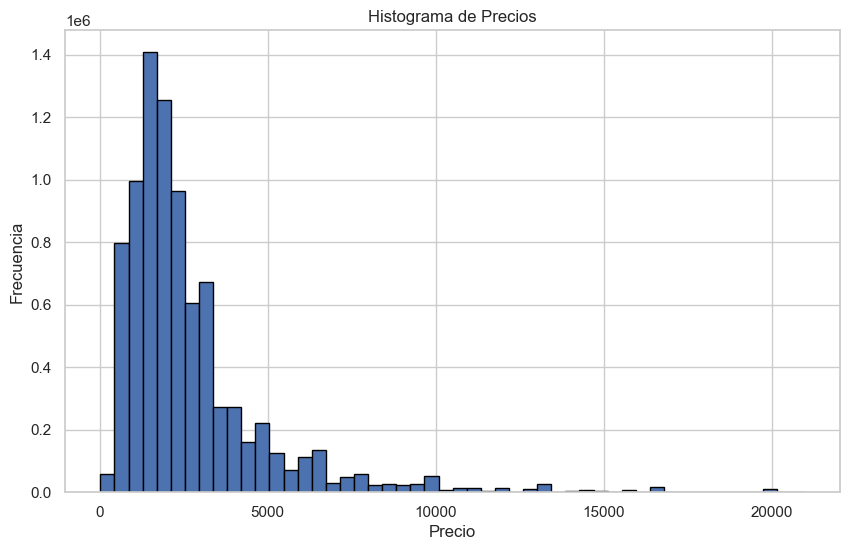

Límite inferior del bin más alto: 1276.42
Límite superior del bin más alto: 1695.56


In [49]:

# Genera el histograma
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(calendar["Price"], bins=50, edgecolor='black')
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Encuentra el índice del intervalo con mayor frecuencia
indice_bin_mas_alto = hist.argmax()

# Obtiene los límites del intervalo con mayor frecuencua 
limite_inferior_bin_mas_alto = bins[indice_bin_mas_alto]
limite_superior_bin_mas_alto = bins[indice_bin_mas_alto + 1]

# Imprime los límites del intervalo con mayor frecuencia
print("Límite inferior del intervalo con mayor frecuencia:", limite_inferior_bin_mas_alto)
print("Límite superior del intervalo con mayor frecuencua:", limite_superior_bin_mas_alto)

## Diagramas de dispersión

Vamos a ver la correlación entre el precio del alojamiento y el valor de la valuación de la propiedad según los usuarios.

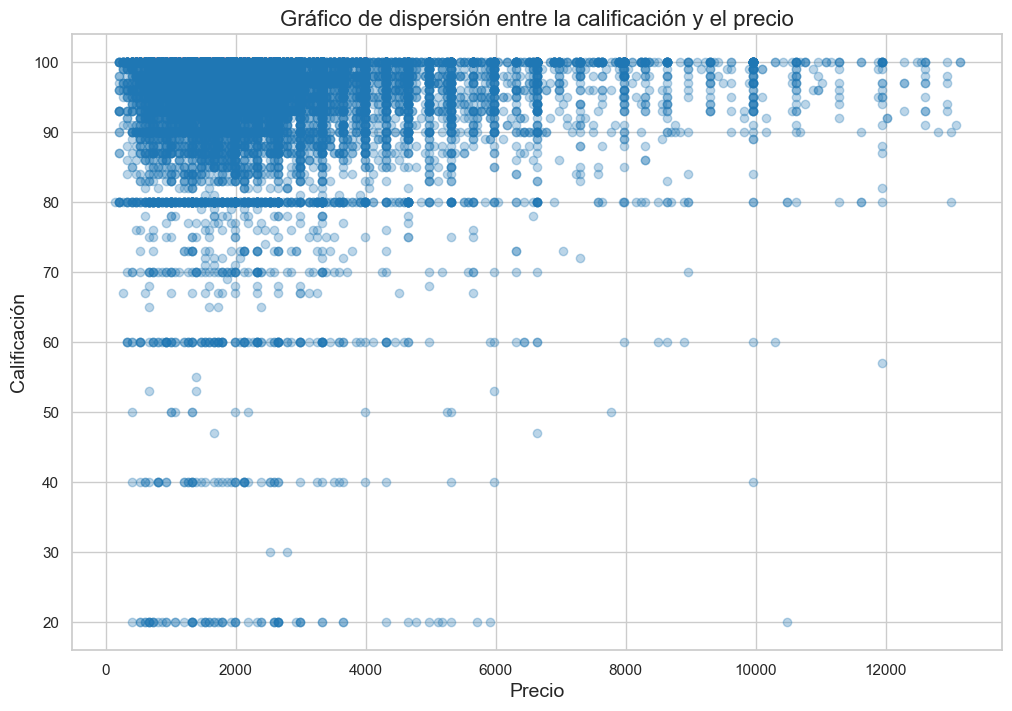

In [50]:
# Establecer un estilo de gráfico de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de dispersión con el mismo color
plt.figure(figsize=(12, 8))
plt.scatter(listings["Price"], listings["Review_scores_rating"], alpha=0.3, color='#1F77B4') 
plt.title('Gráfico de dispersión entre la calificación y el precio', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Calificación', fontsize=14)

plt.grid(True)
plt.show()


En la gráfica se puede observar que a medida que la calificación disminuye, el precio de la renta del alojamiento tiende a ser menor. Además, se aprecia que la mayoría de los alojamientos tienen una calificación mayor a 80.

### Gráficas de barras

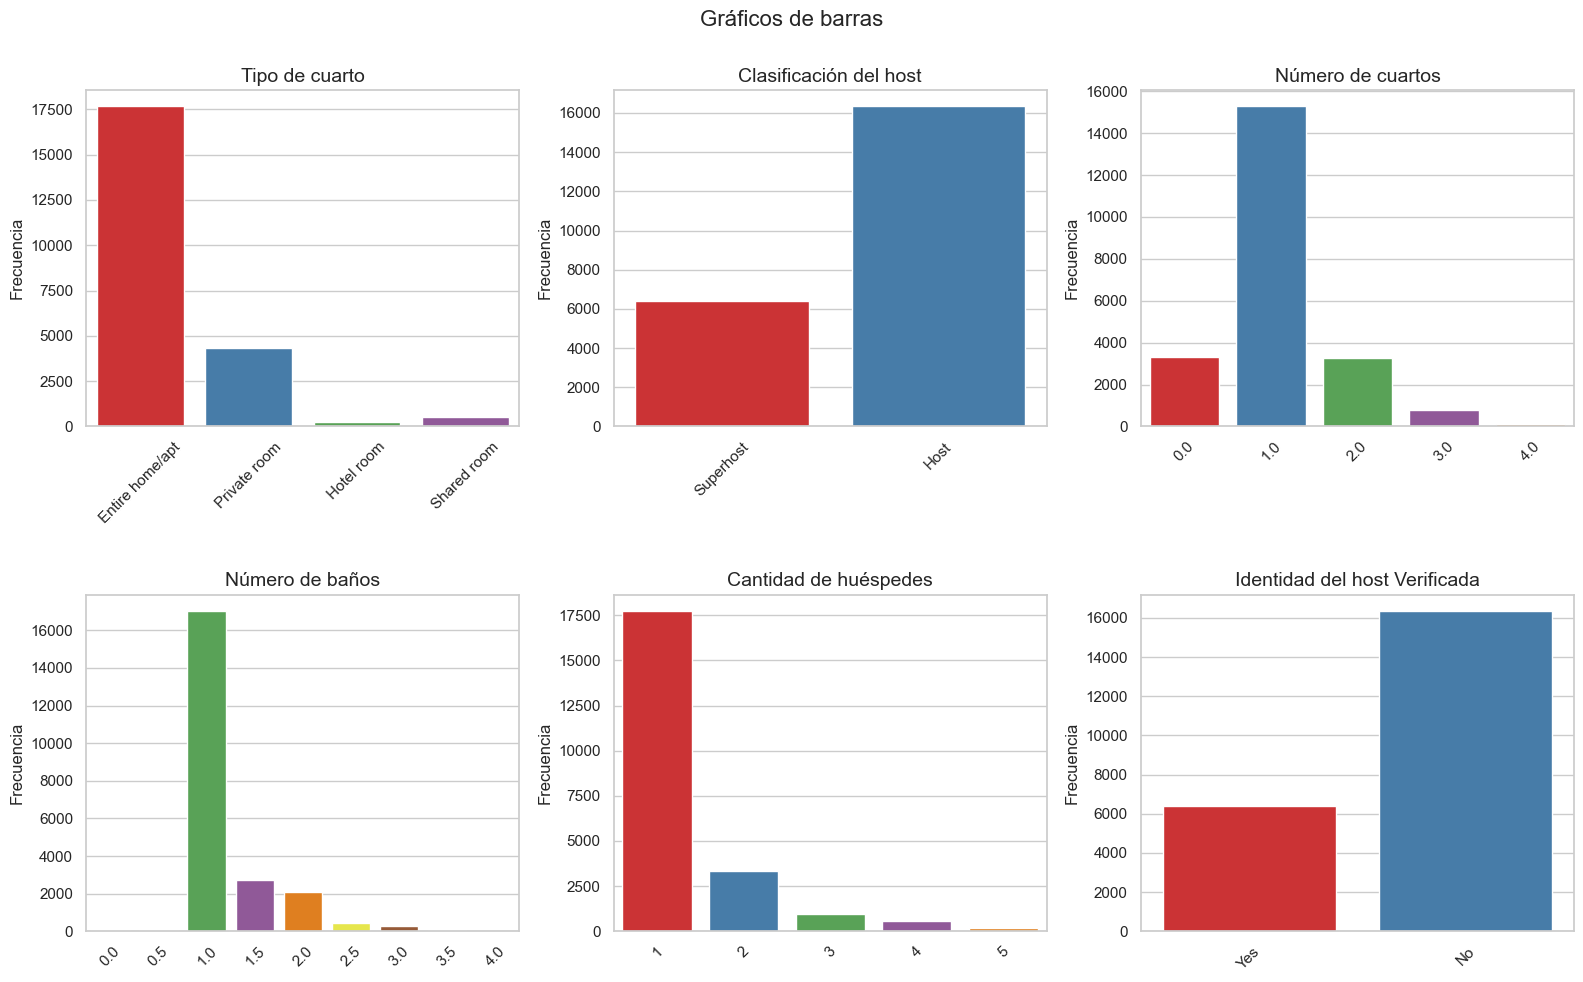

In [51]:
import warnings

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

# Establecer el rango máximo para Bedrooms, Bathrooms y Guests_included porque tenemos valores muy altos
max_bedrooms = 4
max_bathrooms = 4
max_guests_included = 5

# Aplicar filtros para limitar los valores en el rango
filtered_listings = listings[(listings["Bedrooms"] <= max_bedrooms) &
                             (listings["Bathrooms"] <= max_bathrooms) &
                             (listings["Guests_included"] <= max_guests_included)]

# Crear un lienzo con 6 subplots en un diseño de 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Gráficos de barras", fontsize=16)

# Nombres de las columnas a graficar
columnas = ["Room_type", "Host_is_superhost", "Bedrooms", "Bathrooms", "Guests_included", "Host_identity_verified"]

# Títulos para los subplots
titulos = ["Tipo de cuarto", "Clasificación del host", "Número de cuartos", "Número de baños", "Cantidad de huéspedes","Identidad del host Verificada"]

# Iterar sobre las columnas y crear gráficos de barras en los subplots
for i, columna in enumerate(columnas):
    row, col = i // 3, i % 3  # Calcular la fila y columna actual
    ax = axes[row, col]  # Seleccionar el subplot actual
    sns.countplot(data=filtered_listings, x=columna, ax=ax, palette="Set1")
    ax.set_title(titulos[i], fontsize=14)  # Agregar título
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_xlabel("")
    ax.tick_params(axis="x", labelrotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
    

# Ajustar el espaciado entre los subplots
plt.tight_layout()  
plt.subplots_adjust(top=0.9, hspace=0.5) 


# Mostrar el lienzo con los subplots
plt.show()

En el gráfico anterior, se destaca que la mayoría de los alojamientos corresponden a "casa entera" en términos de tipo de cuarto. Además, se observa que la mayoría de los anfitriones no ostentan la condición de "superhost". En cuanto a las características de los alojamientos, prevalecen aquellos con una sola habitación y un solo baño, diseñados para albergar a una sola persona. También es notable que la identidad del anfitrión no ha sido verificada en la mayoría de los casos.

### Gráfico de lineas


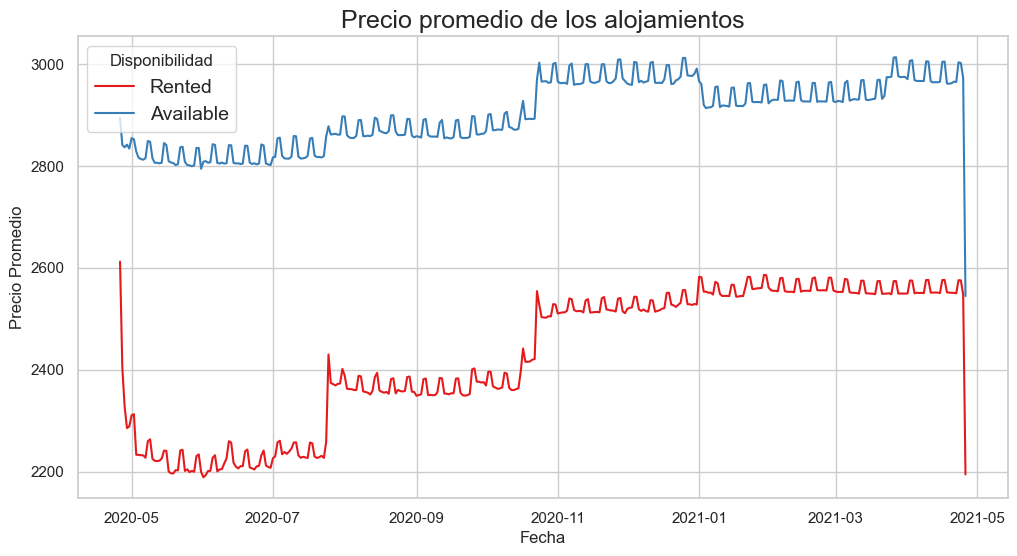

In [52]:
# Calcular el precio promedio por fecha y categoría
precio_promedio =calendar.groupby(['Date', 'Available'])['Price'].mean().reset_index()

# Crear un gráfico de líneas dividido por categoría "Available" y "Rented"
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set1")  

for category, color in zip(["Rented","Available"], palette):
    data = precio_promedio[precio_promedio['Available'] == category]
    plt.plot(data['Date'], data['Price'], label=category, color=color)

plt.title('Precio promedio de los alojamientos',fontsize = 18)
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend(title='Disponibilidad',fontsize = 14,loc= "upper left")
plt.grid(True)
plt.show()


En la gráfica, se presenta una representación del precio promedio de los alojamientos a lo largo del tiempo, diferenciando entre aquellos que fueron alquilados y los que no lo fueron. Notamos que el precio promedio de los alojamientos que fueron alquilados es  menor en comparación con el precio promedio de los alojamientos que permanecieron disponibles y no se alquilaron.